# 06-1 군집 알고리즘
##### 흑백 사진 분류를 위해 비지도 학습과 군집 알고리즘에 대해 이해합니다
- 고객이 마켓에서 사고싶은 과일 사진을 전송 -> 가장 많이 요청하는 과일을 판매 품목으로 선정
- 1위로 선정된 과일 사진을 보낸 고객 중 몇 명을 뽑아 이벤트 당첨자로 선정

### 타깃을 모르는 비지도 학습
- 비지도 학습(unsupervised learning) : 타깃을 모를떄 사용하는 알고리즘

### 과일 사진 데이터 준비하기
- 데이터 저장

In [7]:
# brew install wget
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2023-12-17 18:49:20--  https://bit.ly/fruits_300_data
bit.ly (bit.ly) 해석 중... 67.199.248.11, 67.199.248.10
다음으로 연결 중: bit.ly (bit.ly)|67.199.248.11|:443... 연결했습니다.
HTTP 요청을 보냈습니다. 응답 기다리는 중... 301 Moved Permanently
위치: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [따라감]
--2023-12-17 18:49:22--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
github.com (github.com) 해석 중... 20.200.245.247
다음으로 연결 중: github.com (github.com)|20.200.245.247|:443... 연결했습니다.
HTTP 요청을 보냈습니다. 응답 기다리는 중... 302 Found
위치: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [따라감]
--2023-12-17 18:49:22--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
raw.githubusercontent.com (raw.githubusercontent.com) 해석 중... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
다음으로 연결 중: raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... 연결했습니다.
HTTP 요청을 보냈습니다. 응답 기다리는 중... 200 OK
길이: 3000128 (2.9M) [application/o

In [8]:
# 데이터 로드 
import numpy as np 
import matplotlib.pyplot as plt

In [9]:
# npy 파일 로드
fruits = np.load('fruits_300.npy')
print(fruits.shape)

(300, 100, 100)


- 이 배열의 첫 번째 차원(300)은 샘플 개수
- 두 번째 차원은(100)은 이미지 높이
- 세 번째 차원은(100)은 이미지 너비

In [10]:
print(fruits[0, 0, :])

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


- 첫 번쨰 행에 있는 픽셀 100개에 들어있는 값을 출력
- 0~255까지의 정수값을 가짐
- 맷플롯립의 imshow() 함수를 사용하면 넘파이 배열로 저장된 이미지를 쉽게 그릴 수 있음
- 흑백 이미지이므로 cmap 매개변수를 gray로 지정

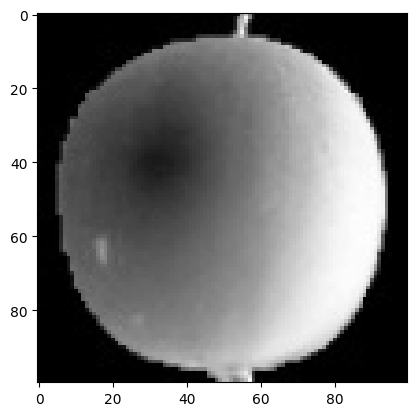

In [11]:
plt.imshow(fruits[0], cmap='gray')
plt.show()

- 0에 가까울수록 검음
- 컴퓨터는 왜 255에 가까운 바탕에 집중하는지?
  - 픽셀이 0이면 출력도 0이되어 의미가 없음. 픽셀값이 높으면 출력값도 커짐
- cmap 매개변수를 gray_r로 지정하면 다시 반전하여 우리 눈에 보기 좋게 출력

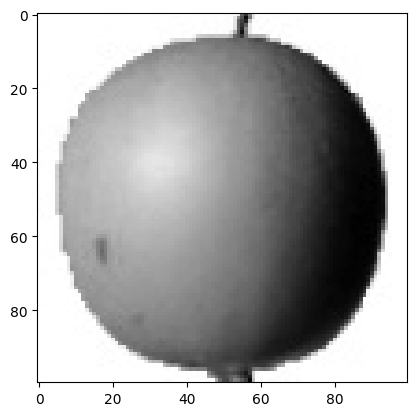

In [12]:
plt.imshow(fruits[0], cmap='gray_r')
plt.show()

- 이 그림에서 밝은 부분이 0에 가깝고 짙은 부분이 255에 가까운 값이라는 것을 꼭 기억!
- 이 데이터는 사과, 바나나, 파인애플이 각각 100개씩 들어있음
- 바나나, 파인애플 이미지도 출력 고고

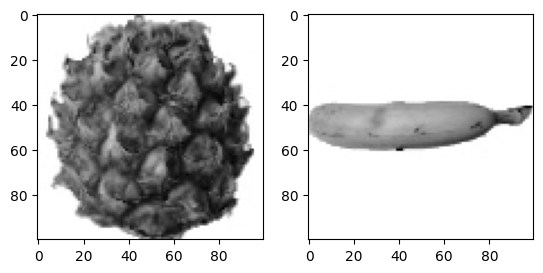

In [13]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(fruits[100], cmap='gray_r')
axs[1].imshow(fruits[200], cmap='gray_r')
plt.show()

- 맷플롯립의 subplots() 함수를 사용하면 여러 개의 그래프를 배열처럼 쌓을 수 있도록 도와줌
- subplots() 함수의 두 매개변수는 그래프를 쌓을 행과 열을 지정
- 여기서는 subplots(1,2)처럼 하나의 행과 2개의 열을 지정
- 반환된 axs는 2개의 서브 그래프를 담고 있는 배열. axs[0]에 파인애플 이미지를, axs[1]에 바나나 이미지를 그림
- subplots()를 사용해 한 번에 여러 개의 이미지를 그려보자
- 각 과일의 평균을 내서 차이를 확인해보자

### 픽셀값 분석하기
